<p style='text-align: justify;'>
<b>Author </b>:Ralph Torres (rrtorres@ucsd.edu) <br>
<b>Notebook created by</b>: Abzer Kelminal (abzer.shah@uni-tuebingen.de) <br>
<b>Use case</b>: Van Krevelen Plots created using the sirius and canopus data <br>
<b>Input file format</b>: .tsv tables of sirius and canopus data <br>
<b>Outputs</b>: .svg plots  <br>
<b>Dependencies</b>: R version 3.4.2 (2017-09-28) and libraries  ggplot2, dplyr, varhandle, reshape2</p>

In [ ]:
#install.packages(c("dplyr","tidyr","stringr","ggthemes","ggplot2",,"svglite"))

In [73]:
library(dplyr)
library(tidyr)
library(stringr)
library(ggthemes)
library(ggplot2)
library(svglite)

#  1) Set working directory and pull files into R

In [74]:
setwd("D:/Projects/20220811_CCE_Correlation/20221011_CombiningSIRIUS_Canopus_Info/Input_files")

In [75]:
sirius <- read.csv('formula_identifications.tsv', sep = "\t", header = T, check.names = F)
canopus <- read.csv('canopus_formula_summary.tsv', sep = "\t", header = T, check.names = F)

In [76]:
head(sirius)
dim(sirius)

rank,molecularFormula,adduct,precursorFormula,SiriusScore,TreeScore,IsotopeScore,numExplainedPeaks,explainedIntensity,medianMassErrorFragmentPeaks(ppm),medianAbsoluteMassErrorFragmentPeaks(ppm),massErrorPrecursor(ppm),lipidClass,ionMass,retentionTimeInSeconds,id
1,C18H33NO3,[M + O + H]+,C18H33NO4,6034.899,6034.899,0,17,0.9990749,0.4761754,0.6088502,-0.9038057,Cer(d8:1_10:1),328.2479,530.6275,4212_CCE1706_MZmine3_SIRIUS_1_31792
2,C24H50NO7P,[M + H]+,C24H50NO7P,6033.942,6033.942,0,9,0.9987027,0.2062636,0.4291218,-0.4214094,LPC(16:0),496.3396,612.7497,5281_CCE1706_MZmine3_SIRIUS_1_36535
3,C24H48NO7P,[M + H]+,C24H48NO7P,6031.156,6031.156,0,12,0.9985987,0.2055313,0.5076841,0.1429701,LPC(16:1),494.3242,586.9197,4860_CCE1706_MZmine3_SIRIUS_1_34584
4,C28H50NO7P,[M + Na]+,C28H50NO7P,6000.576,6000.576,0,8,0.9964158,0.5202156,0.5202156,-0.1252998,PC 20:4,566.3216,592.4316,5000_CCE1706_MZmine3_SIRIUS_1_35272
5,C22H46NO7P,[M + H]+,C22H46NO7P,5012.534,5012.534,0,7,1.0000000,0.2863623,0.8617761,0.2031141,LPC(14:0),468.3086,578.9126,4783_CCE1706_MZmine3_SIRIUS_1_34263
6,C28H48NO7P,[M + Na]+,C28H48NO7P,5012.058,5012.058,0,10,1.0000000,0.2408936,0.3768631,-0.3924778,PC 20:5,564.3058,584.1577,4824_CCE1706_MZmine3_SIRIUS_1_34446


[1] 5622   16

In [77]:
head(canopus, n=2)
dim(canopus)

id,molecularFormula,adduct,NPC#pathway,NPC#pathway Probability,NPC#superclass,NPC#superclass Probability,NPC#class,NPC#class Probability,ClassyFire#most specific class,ClassyFire#most specific class Probability,ClassyFire#level 5,ClassyFire#level 5 Probability,ClassyFire#subclass,ClassyFire#subclass Probability,ClassyFire#class,ClassyFire#class Probability,ClassyFire#superclass,ClassyFire#superclass probability,ClassyFire#all classifications
3_CCE1706_MZmine3_SIRIUS_1_16,C12H14O4,[M + H]+,Terpenoids,0.7940349,Monoterpenoids,0.5056386,Menthane monoterpenoids,0.1241971,Alkyl aryl ethers,0.7523554,Alkyl aryl ethers,0.7523554,Ethers,0.8181270,Organooxygen compounds,1.0000000,Organic oxygen compounds,1.0000000,Organic compounds; Alkyl aryl ethers; Ethers; Organic acids and derivatives; Carboxylic acids and derivatives; Organooxygen compounds; Monocarboxylic acids and derivatives; Carboxylic acids; Carbonyl compounds; Benzene and substituted derivatives; Benzenoids; Organic oxides; Hydrocarbon derivatives; Organic oxygen compounds; Chemical entities
230_CCE1706_MZmine3_SIRIUS_1_1010,C8H10O3,[M + H]+,Polyketides,0.4567732,Cyclic polyketides,0.4371876,2-pyrone derivatives,0.2208082,Butenolides,0.5295858,Butenolides,0.5295858,Furanones,0.3012136,Dihydrofurans,0.4006606,Organoheterocyclic compounds,0.8681622,Organic compounds; Organoheterocyclic compounds; Lactones; Organic acids and derivatives; Carboxylic acids and derivatives; Organooxygen compounds; Carboxylic acid derivatives; Monocarboxylic acids and derivatives; Carboxylic acid esters; Carbonyl compounds; Butenolides; Organic oxides; Oxacyclic compounds; Hydrocarbon derivatives; Organic oxygen compounds; Chemical entities


[1] 1838   20

# 2) Arranging Sirius and Canopus files in the right format:

In [78]:
#Arranging Sirius and Canopus files in the right format for further analysis:

#Renaming certain column headers to retain different molecular formulas
sirius <- rename(sirius, 'Sirius_molecularFormula' = 'molecularFormula')
canopus <- rename(canopus, 'Canopus_molecularFormula' = 'molecularFormula')

#Merging both Canopus and Sirius dataframes by id
all <- merge(canopus, sirius, by = 'id', all = TRUE)

In [79]:
head(all)

id,Canopus_molecularFormula,adduct.x,NPC#pathway,NPC#pathway Probability,NPC#superclass,NPC#superclass Probability,NPC#class,NPC#class Probability,ClassyFire#most specific class,...,TreeScore,IsotopeScore,numExplainedPeaks,explainedIntensity,medianMassErrorFragmentPeaks(ppm),medianAbsoluteMassErrorFragmentPeaks(ppm),massErrorPrecursor(ppm),lipidClass,ionMass,retentionTimeInSeconds
10_CCE1706_MZmine3_SIRIUS_1_29,C4H5ClO2,[M + K]+,Fatty acids,0.2813045,Phenolic acids (C6-C1),0.07476562,Furans,0.08695447,Chlorophenols,...,15.260734,0.000000,3,0.9772021,3.02842331,3.0284233,2.307786e+00,,158.9613,29.71421
100_CCE1706_MZmine3_SIRIUS_1_539,C6H12N2O3,[M + H]+,Amino acids and Peptides,0.9642323,Small peptides,0.96972007,Aminoacids,0.81977415,Beta amino acids and derivatives,...,18.774678,0.000000,3,1.0000000,1.87405882,1.8740588,1.149861e+00,,161.0923,38.05900
1010_CCE1706_MZmine3_SIRIUS_1_4852,C28H42N2O18,[M + H]+,Carbohydrates,0.9816141,Saccharides,0.70890170,Polysaccharides,0.45395917,Oligosaccharides,...,15.950107,0.000000,5,1.0000000,0.12353391,0.2085355,-5.037716e-01,,695.2502,198.98237
1012_CCE1706_MZmine3_SIRIUS_1_4868,C16H23NO5,[M + K]+,Polyketides,0.7604896,Linear polyketides,0.83636403,Open-chain polyketides,0.53873676,Alpha amino acids and derivatives,...,11.412896,0.000000,3,1.0000000,0.05476234,0.6685685,2.257804e-01,,348.1209,199.55000
1013_CCE1706_MZmine3_SIRIUS_1_4876,C16H25NO6,[M + H]+,Alkaloids,0.8029711,Tetramate alkaloids,0.31418300,Open-chain polyketides,0.14794198,Tertiary alcohols,...,13.273112,3.559234,3,1.0000000,-0.38883612,1.1280503,-1.187775e+00,,328.1751,195.77125
1016_CCE1706_MZmine3_SIRIUS_1_4899,C16H22N2O8,[M - H2O + H]+,Amino acids and Peptides,0.8177441,Small peptides,0.25893301,Dipeptides,0.29324588,Alpha amino acids and derivatives,...,7.894214,0.000000,3,1.0000000,2.71941337,2.7194134,-5.100096e+04,,353.1347,187.88130


In [80]:
# Indexing feature ID out of id
all <- separate(data = all, col = id, into = c(NA, NA, NA, NA, NA, 'row.ID'), sep = '_')
head(all)

row.ID,Canopus_molecularFormula,adduct.x,NPC#pathway,NPC#pathway Probability,NPC#superclass,NPC#superclass Probability,NPC#class,NPC#class Probability,ClassyFire#most specific class,...,TreeScore,IsotopeScore,numExplainedPeaks,explainedIntensity,medianMassErrorFragmentPeaks(ppm),medianAbsoluteMassErrorFragmentPeaks(ppm),massErrorPrecursor(ppm),lipidClass,ionMass,retentionTimeInSeconds
29,C4H5ClO2,[M + K]+,Fatty acids,0.2813045,Phenolic acids (C6-C1),0.07476562,Furans,0.08695447,Chlorophenols,...,15.260734,0.000000,3,0.9772021,3.02842331,3.0284233,2.307786e+00,,158.9613,29.71421
539,C6H12N2O3,[M + H]+,Amino acids and Peptides,0.9642323,Small peptides,0.96972007,Aminoacids,0.81977415,Beta amino acids and derivatives,...,18.774678,0.000000,3,1.0000000,1.87405882,1.8740588,1.149861e+00,,161.0923,38.05900
4852,C28H42N2O18,[M + H]+,Carbohydrates,0.9816141,Saccharides,0.70890170,Polysaccharides,0.45395917,Oligosaccharides,...,15.950107,0.000000,5,1.0000000,0.12353391,0.2085355,-5.037716e-01,,695.2502,198.98237
4868,C16H23NO5,[M + K]+,Polyketides,0.7604896,Linear polyketides,0.83636403,Open-chain polyketides,0.53873676,Alpha amino acids and derivatives,...,11.412896,0.000000,3,1.0000000,0.05476234,0.6685685,2.257804e-01,,348.1209,199.55000
4876,C16H25NO6,[M + H]+,Alkaloids,0.8029711,Tetramate alkaloids,0.31418300,Open-chain polyketides,0.14794198,Tertiary alcohols,...,13.273112,3.559234,3,1.0000000,-0.38883612,1.1280503,-1.187775e+00,,328.1751,195.77125
4899,C16H22N2O8,[M - H2O + H]+,Amino acids and Peptides,0.8177441,Small peptides,0.25893301,Dipeptides,0.29324588,Alpha amino acids and derivatives,...,7.894214,0.000000,3,1.0000000,2.71941337,2.7194134,-5.100096e+04,,353.1347,187.88130


Indexing molecular formulas into C, N, H, P, O, S, etc.:

In [81]:
# First, Sirius molecular formulas

#splits the molecular formula if alphabets are present in it such as 'C13' 'H22' 'S'
molecules <- regmatches(all$Sirius_molecularFormula, gregexpr("\\b[A-Z][a-z]*\\d*", all$Sirius_molecularFormula))

#adds 1 to molecular names when there is no number next to the alphabet. For ex:'C13' 'H22' 'S1'
molecules <- lapply(molecules, function(a) paste0(a, ifelse(grepl("[^0-9]$", a), "1", "")))#ASCII code [^0-9] --> Non-digits

#Creates a list where each list elements has the atom counts with their names set as, for ex: C, H, S
atomcounts <- lapply(molecules, function(mol) setNames(as.integer(gsub("\\D", "", mol)), gsub("\\d", "", mol)))

#unlists the atomcounts and get all the atom names into 'atoms' character string
atoms <- unique(unlist(sapply(atomcounts, names)))
                     
#gets the corresponding atom counts into 'atoms', making it a matrix
atoms <- sapply(atoms, function(atom) sapply(atomcounts, function(a) if (atom %in% names(a)) a[atom] else 0))
rownames(atoms) <- all$Sirius_molecularFormula
head(atoms)
                                             
Sirius_formula <- as.data.frame(atoms)
rownames(Sirius_formula) <- NULL
colnames(Sirius_formula) <- paste(colnames(Sirius_formula), "Sirius", sep = '_')

Sirius_final <- cbind(all, Sirius_formula)

,C,H,Cl,O,N,S,F,P,B,I,Br
C4H5ClO2,4,5,1,2,0,0,0,0,0,0,0
C6H12N2O3,6,12,0,3,2,0,0,0,0,0,0
C28H42N2O18,28,42,0,18,2,0,0,0,0,0,0
C16H23NO5,16,23,0,5,1,0,0,0,0,0,0
C16H25NO6,16,25,0,6,1,0,0,0,0,0,0
C16H20N2O7,16,20,0,7,2,0,0,0,0,0,0


In [82]:
#Next, Canopus molecular formulas
molecules <- regmatches(Sirius_final$Canopus_molecularFormula, gregexpr("\\b[A-Z][a-z]*\\d*", Sirius_final$Canopus_molecularFormula))
molecules <- lapply(molecules, function(a) paste0(a, ifelse(grepl("[^0-9]$", a), "1", "")))

atomcounts <- lapply(molecules, function(mol) setNames(as.integer(gsub("\\D", "", mol)), gsub("\\d", "", mol)))

atoms <- unique(unlist(sapply(atomcounts, names)))
atoms <- sapply(atoms, function(atom) sapply(atomcounts, function(a) if (atom %in% names(a)) a[atom] else 0))
rownames(atoms) <- Sirius_final$Canopus_molecularFormula
head(atoms)

Canopus_formula <- as.data.frame(atoms)
rownames(Canopus_formula) <- NULL
colnames(Canopus_formula) <- paste(colnames(Canopus_formula), "Canopus", sep = '_')

,C,H,Cl,O,N,S,F,P,B,I,Br
C4H5ClO2,4,5,1,2,0,0,0,0,0,0,0
C6H12N2O3,6,12,0,3,2,0,0,0,0,0,0
C28H42N2O18,28,42,0,18,2,0,0,0,0,0,0
C16H23NO5,16,23,0,5,1,0,0,0,0,0,0
C16H25NO6,16,25,0,6,1,0,0,0,0,0,0
C16H22N2O8,16,22,0,8,2,0,0,0,0,0,0


In [83]:
final <- cbind(Sirius_final, Canopus_formula)
head(final)

row.ID,Canopus_molecularFormula,adduct.x,NPC#pathway,NPC#pathway Probability,NPC#superclass,NPC#superclass Probability,NPC#class,NPC#class Probability,ClassyFire#most specific class,...,H_Canopus,Cl_Canopus,O_Canopus,N_Canopus,S_Canopus,F_Canopus,P_Canopus,B_Canopus,I_Canopus,Br_Canopus
29,C4H5ClO2,[M + K]+,Fatty acids,0.2813045,Phenolic acids (C6-C1),0.07476562,Furans,0.08695447,Chlorophenols,...,5,1,2,0,0,0,0,0,0,0
539,C6H12N2O3,[M + H]+,Amino acids and Peptides,0.9642323,Small peptides,0.96972007,Aminoacids,0.81977415,Beta amino acids and derivatives,...,12,0,3,2,0,0,0,0,0,0
4852,C28H42N2O18,[M + H]+,Carbohydrates,0.9816141,Saccharides,0.70890170,Polysaccharides,0.45395917,Oligosaccharides,...,42,0,18,2,0,0,0,0,0,0
4868,C16H23NO5,[M + K]+,Polyketides,0.7604896,Linear polyketides,0.83636403,Open-chain polyketides,0.53873676,Alpha amino acids and derivatives,...,23,0,5,1,0,0,0,0,0,0
4876,C16H25NO6,[M + H]+,Alkaloids,0.8029711,Tetramate alkaloids,0.31418300,Open-chain polyketides,0.14794198,Tertiary alcohols,...,25,0,6,1,0,0,0,0,0,0
4899,C16H22N2O8,[M - H2O + H]+,Amino acids and Peptides,0.8177441,Small peptides,0.25893301,Dipeptides,0.29324588,Alpha amino acids and derivatives,...,22,0,8,2,0,0,0,0,0,0


# Van Krevelen Plots:

Text copied from: <b>Mass spectrometry-based metabolomics for an in-depth questioning of human health </b>
Sandra Alves, Advances in Clinical Chemistry, 2020
<p style='text-align: justify;'>    
The van Krevelen diagram was initially developed to characterize complex samples by the ratio of elements, i.e., the number of carbons (C) to hydrogens (H). With the progress in mass spectrometry providing accurate mass measurements, the analysis of individual components in a complex mixture has become possible. 
<p style='text-align: justify;'> 
A prerequisite is to convert the accurate masses measured into elemental formulas. The van Krevelen diagram is a 2 or 3D graphical analysis in which the elemental compositions of compounds are plotted according to their atomic ratios, e.g., the plot of H/C ratio vs O/C ratio. The H/C ratio separates compounds according to their degree of saturation whereas the O/C and N/C ratios display the O and N classes, respectively. 
<p style='text-align: justify;'> 
The van Krevelen diagram was used to characterize the chemical composition of wine, allowing its authentication [83]. Specific regions of the van Krevelen diagram are associated with specific classes of compounds, such as carbohydrates (for H/C 2 and O/C 1), or lipids (for O/C < 0.2 and H/C 2) [84]. Hence, the van Krevelen diagram can be a promising tool to analyze metabolomic data, it enables to localize the classes of metabolites and to visualize the biochemical transformations.
</p>

In [84]:
df <- final

In [85]:
#C:N, O:C, H:C and average C oxidation columns
df$C_N <- df$C_Sirius / df$N_Sirius
df$O_C <- df$O_Sirius / df$C_Sirius
df$H_C <- df$H_Sirius / df$C_Sirius
df$avCox <- -((1*df$H_Sirius) - (3*df$N_Sirius) - (2*df$O_Sirius) + (5*df$P_Sirius) -(2*df$S_Sirius))/(df$C_Sirius)

In [86]:
head(df)

row.ID,Canopus_molecularFormula,adduct.x,NPC#pathway,NPC#pathway Probability,NPC#superclass,NPC#superclass Probability,NPC#class,NPC#class Probability,ClassyFire#most specific class,...,S_Canopus,F_Canopus,P_Canopus,B_Canopus,I_Canopus,Br_Canopus,C_N,O_C,H_C,avCox
29,C4H5ClO2,[M + K]+,Fatty acids,0.2813045,Phenolic acids (C6-C1),0.07476562,Furans,0.08695447,Chlorophenols,...,0,0,0,0,0,0,Inf,0.5000000,1.2500,-0.250
539,C6H12N2O3,[M + H]+,Amino acids and Peptides,0.9642323,Small peptides,0.96972007,Aminoacids,0.81977415,Beta amino acids and derivatives,...,0,0,0,0,0,0,3,0.5000000,2.0000,0.000
4852,C28H42N2O18,[M + H]+,Carbohydrates,0.9816141,Saccharides,0.70890170,Polysaccharides,0.45395917,Oligosaccharides,...,0,0,0,0,0,0,14,0.6428571,1.5000,0.000
4868,C16H23NO5,[M + K]+,Polyketides,0.7604896,Linear polyketides,0.83636403,Open-chain polyketides,0.53873676,Alpha amino acids and derivatives,...,0,0,0,0,0,0,16,0.3125000,1.4375,-0.625
4876,C16H25NO6,[M + H]+,Alkaloids,0.8029711,Tetramate alkaloids,0.31418300,Open-chain polyketides,0.14794198,Tertiary alcohols,...,0,0,0,0,0,0,16,0.3750000,1.5625,-0.625
4899,C16H22N2O8,[M - H2O + H]+,Amino acids and Peptides,0.8177441,Small peptides,0.25893301,Dipeptides,0.29324588,Alpha amino acids and derivatives,...,0,0,0,0,0,0,8,0.4375000,1.2500,0.000


<font color="red"> @Ralph: Cpuld you explain the below cells:
1) How we decide the cutoff?  
2) Why we subset the dataframe df_vk?

In [87]:
#Only using Sirius formulas for cutoff, creating van krevelen data frame and cutoffs.

#Cutoff will be C/N < 4 ; O/C > 2; H/C > 2.5
df_vk <- subset(df, O_C <2 & H_C < 2.5 & C_N > 4.5)
df_vk <- subset(df_vk, avCox >-4)
df_vk <- subset(df_vk, avCox <4)

In [88]:
## Van Krevelen Plots
vk <- df_vk[-c(307:353, 356)]

null device 
          1

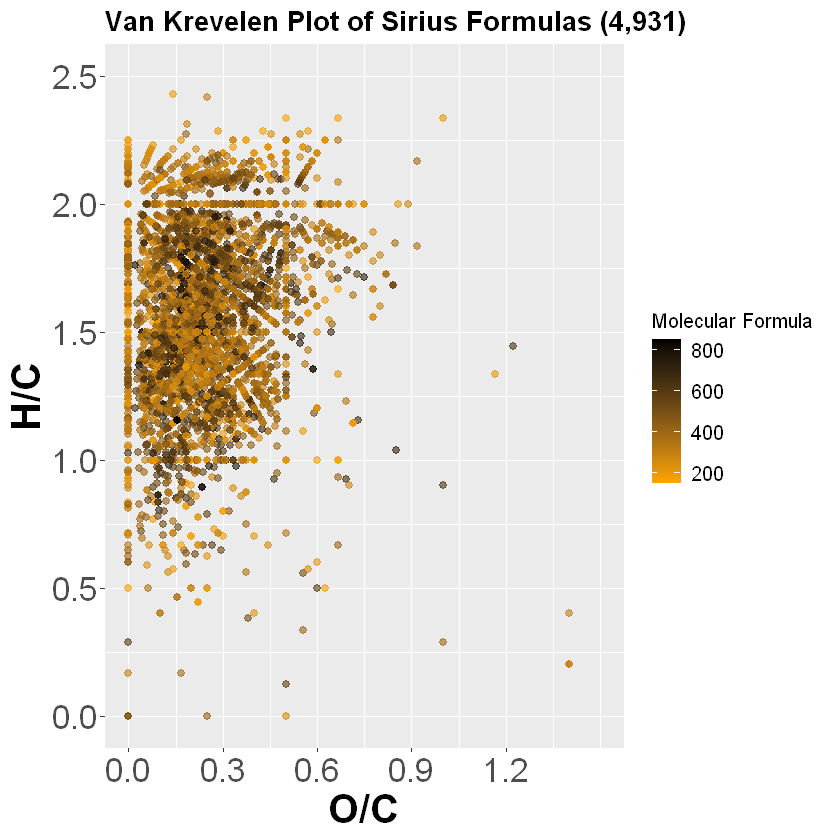

In [89]:
#Molecular Formula
VK <- ggplot(vk, aes(x = O_C, y = H_C)) +
  geom_point(aes(color = ionMass), size = 2, na.rm = TRUE, alpha = 0.6) +
  scale_color_gradient(name = "Molecular Formula",
                       low = ("orange"), high = ("black")) +
  theme(plot.title = element_text(size = 16, face = "bold"),
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 12),
        axis.title = element_text(face = "bold"), 
        axis.text.x = element_text(size = 20), 
        axis.text.y = element_text(size = 20), 
        axis.title.x = element_text(size = 24),
        axis.title.y = element_text(size = 24)) +
  ggtitle('Van Krevelen Plot of Sirius Formulas (4,931)') +
  labs(x = "O/C", y = "H/C") +
  scale_x_continuous(limits = c(0, 1.5), breaks = seq(0.0, 1.2, by = 0.3)) +
  scale_y_continuous(limits = c(0, 2.5), breaks = seq(0.0, 2.5, by = 0.5))

#svglite("Van_Krevelen_Plot_Sirius_formula.svg")
VK
dev.off()

null device 
          1

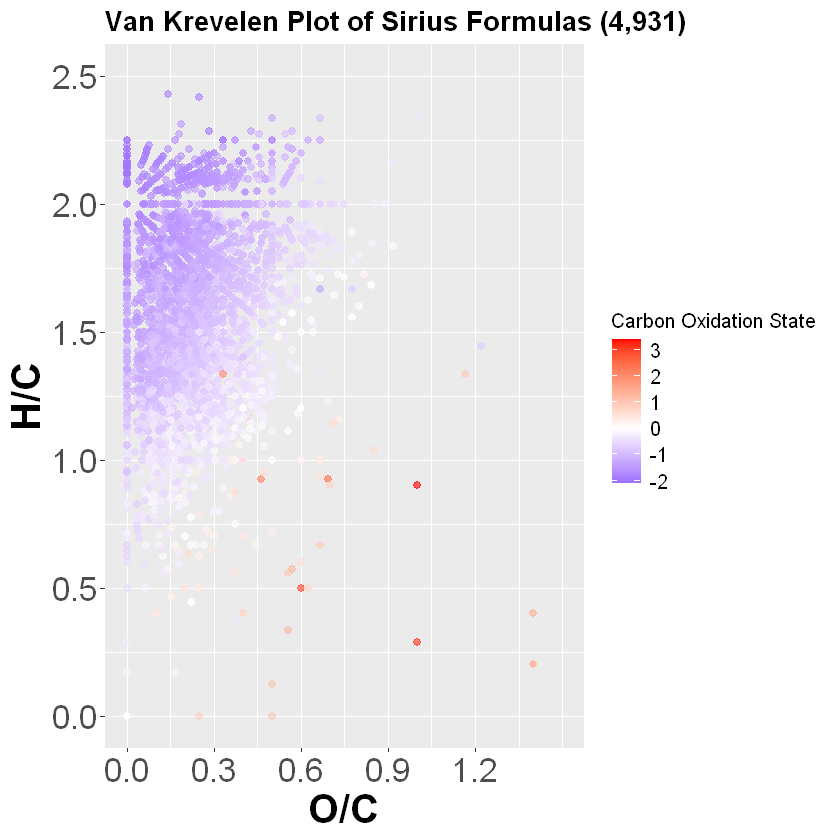

In [90]:
#Avg Oxidation State

VK2 <- ggplot(df_vk, aes(x = O_C, y = H_C)) +
  geom_point(aes(color = avCox), size = 2, na.rm = TRUE, alpha = 0.6) +
  scale_color_gradient2(name = "Carbon Oxidation State",
                        low = ("blue"), mid = ("white"), high = ("red"), midpoint = 0) +
  theme(plot.title = element_text(size = 16, face = "bold"),
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 12),
        axis.title = element_text(face = "bold"), 
        axis.text.x = element_text(size = 20), 
        axis.text.y = element_text(size = 20), 
        axis.title.x = element_text(size = 24),
        axis.title.y = element_text(size = 24)) +
  ggtitle('Van Krevelen Plot of Sirius Formulas (4,931)') +
  labs(x = "O/C", y = "H/C") +
  scale_x_continuous(limits = c(0, 1.5), breaks = seq(0.0, 1.2, by = 0.3)) +
  scale_y_continuous(limits = c(0, 2.5), breaks = seq(0.0, 2.5, by = 0.5))

#svglite("Van_Krevelen_Plot_Sirius_formula.svg")
VK2
dev.off()